In [1]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.saving import load_model

2023-11-09 10:43:36.969690: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 10:43:36.971541: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 10:43:36.996955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 10:43:36.996994: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 10:43:36.997026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Data normalization
normalize = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

In [3]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [4]:
# Set directories
root_dir = os.getcwd()
model_dir = os.path.join(root_dir, 'models')
test_dir = os.path.join(root_dir, 'test-dataset')
aedes_dir = os.path.join(test_dir, 'Aedes Aegypti')
culex_dir = os.path.join(test_dir, 'Culex Quinquefasciatus')

In [5]:
model = load_model(os.path.join(model_dir, 'mosquitoes_model.keras'))

In [6]:
# model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                           include_top=False,
#                                           weights='imagenet',
#                                           )

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)       

In [8]:
idx = [1, 4]

In [9]:
outputs = [model.layers[i].output for i in idx]

In [10]:
model = Model(inputs=model.inputs, outputs=outputs)

1/1 [==============================] - 0s 79ms/step


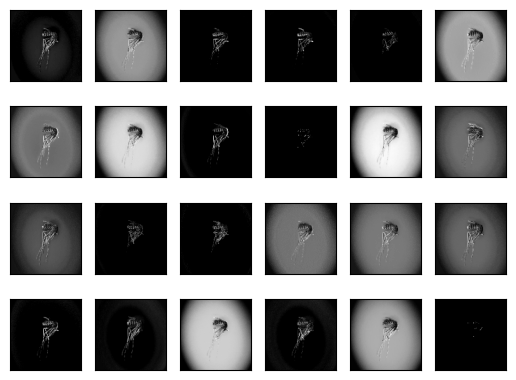

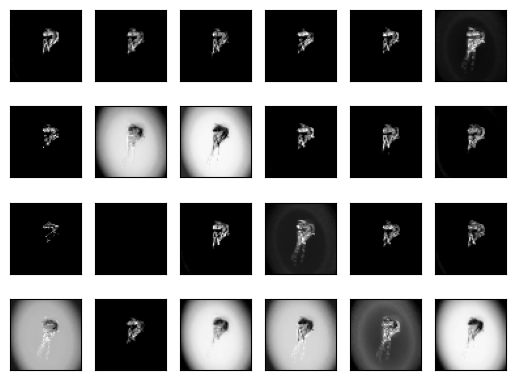

In [11]:
img = cv2.imread(os.path.join(aedes_dir, '0007.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_LINEAR)
x = np.expand_dims(x/255, 0)

yhat = model.predict(x)

for fmap in yhat:
	ix = 1
	for _ in range(4):
		for _ in range(6):
			ax = plt.subplot(4, 6, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()